***
# <font color=indianred size=10>BEER CONSUMPTION DATA - SP</font>
***

# <font color=lightcoral>1) INTRODUCTION</font>
***

This dataset intend predict the beer consumption in Sao Paulo - Brazil

The temperatures are in Celsius (C).

In the column "weekend", 0.0 means "No", and 1.0 means "Yes".

The data about consumption are in KiloLiter (KL).

The source of data is on kaggle: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

# <font color=lightcoral>2) IMPORTING DATA AND LIBRARIES</font>
***

In [372]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

In [373]:
df = pd.read_csv('Consumo_cerveja.csv')
df['Data'] = pd.to_datetime(df['Data'])

In [374]:
df.head(1)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461


In [375]:
df = df.rename({"Data": "date"}, axis=1)
df = df.rename({"Temperatura Media (C)": "avrg_temperature"}, axis=1)
df = df.rename({"Temperatura Minima (C)": "min_temperature"}, axis=1)
df = df.rename({"Temperatura Maxima (C)": "max_temperature"}, axis=1)
df = df.rename({"Precipitacao (mm)": "rain"}, axis=1)
df = df.rename({"Final de Semana": "weekend"}, axis=1)
df = df.rename({"Consumo de cerveja (litros)": "consumption"}, axis=1)
df.head(1)

,date,avrg_temperature,min_temperature,max_temperature,rain,weekend,consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461


In [376]:
print("Total of lines and columns =", df.shape)

Total of lines and columns = (941, 7)


# <font color=lightcoral>3) EXPLORATORY ANALYSIS</font>
***

In [377]:
df['avrg_temperature'] = df['avrg_temperature'].str.replace(',', '.').astype('float64')
df['min_temperature'] = df['min_temperature'].str.replace(',', '.').astype('float64')
df['max_temperature'] = df['max_temperature'].str.replace(',', '.').astype('float64')
df['rain'] = df['rain'].str.replace(',', '.').astype('float64')

In [378]:
df.head(3)

,date,avrg_temperature,min_temperature,max_temperature,rain,weekend,consumption
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814


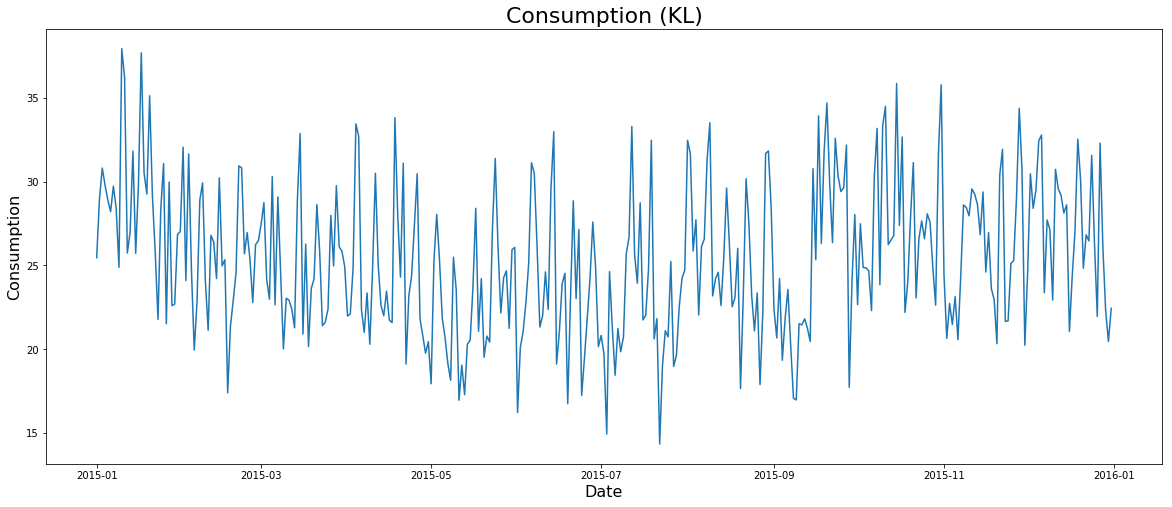

In [379]:
ax = sns.lineplot(x="date", y="consumption", data=df)
ax.set_title('Consumption (KL)', fontsize=22)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Consumption', fontsize=16)
ax = plt.gcf().set_size_inches(20,8)
ax

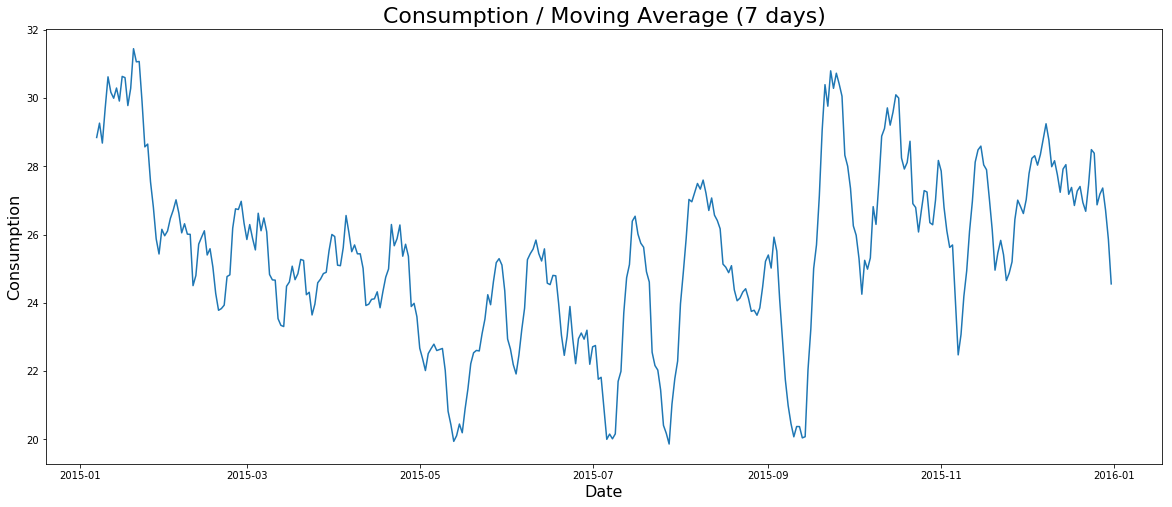

In [380]:
df['rol7'] = df.consumption.rolling(7).mean().shift(0)
df.head(10)

ax = sns.lineplot(x="date", y="rol7", data=df)
ax.set_title('Consumption / Moving Average (7 days)', fontsize=22)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Consumption', fontsize=16)
ax = plt.gcf().set_size_inches(20,8)
ax

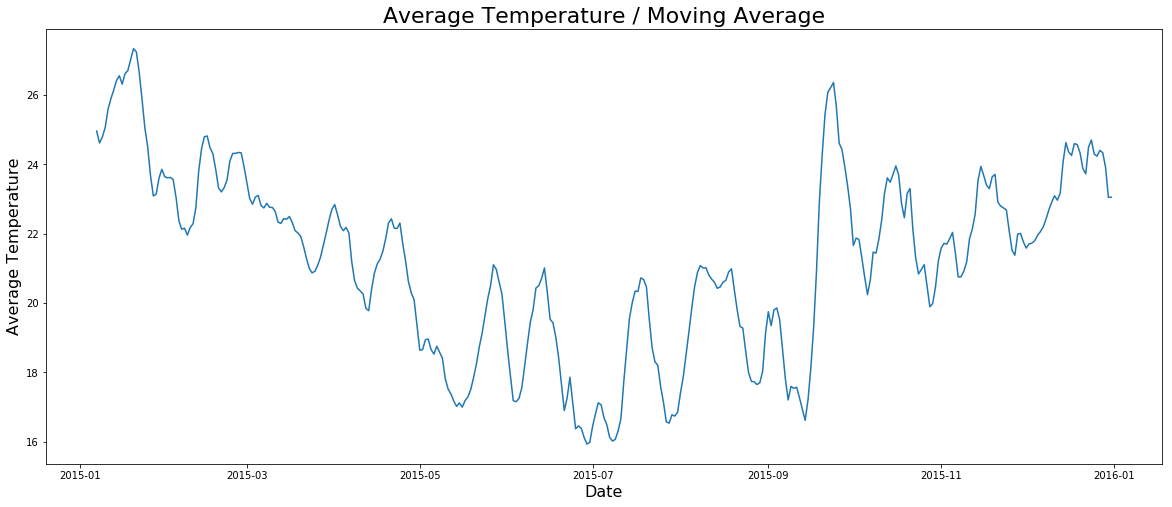

In [381]:
df['rol7_x'] = df.avrg_temperature.rolling(7).mean().shift(0)
df.head(10)

ax = sns.lineplot(x="date", y="rol7_x", data=df)
ax.set_title('Average Temperature / Moving Average', fontsize=22)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Average Temperature', fontsize=16)
ax = plt.gcf().set_size_inches(20,8)
ax

In [382]:
df['day_of_week'] = df['date'].dt.day_name()
df.head(3)

,date,avrg_temperature,min_temperature,max_temperature,rain,weekend,consumption,rol7,rol7_x,day_of_week
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,NaN,NaN,Thursday
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,NaN,NaN,Friday
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,NaN,NaN,Saturday


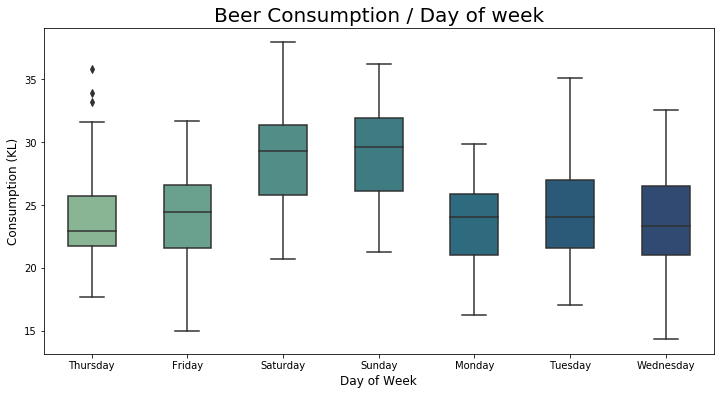

In [383]:
ax = sns.boxplot(y='consumption', x='day_of_week', data=df, orient='v', width=0.5, palette="crest")
ax.figure.set_size_inches(12, 6)
ax.set_title('Beer Consumption / Day of week', fontsize=20)
ax.set_ylabel('Consumption (KL)', fontsize=12)
ax.set_xlabel('Day of Week', fontsize=12)
ax

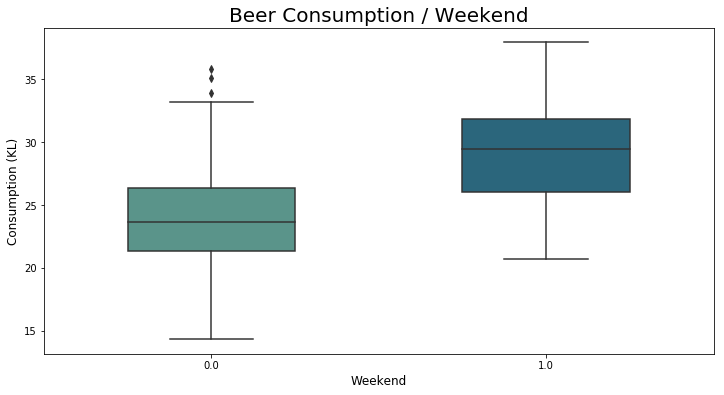

In [384]:
ax = sns.boxplot(y='consumption', x='weekend', data=df, orient='v', width=0.5, palette="crest")
ax.figure.set_size_inches(12, 6)
ax.set_title('Beer Consumption / Weekend', fontsize=20)
ax.set_ylabel('Consumption (KL)', fontsize=12)
ax.set_xlabel('Weekend', fontsize=12)
ax


# <font color=lightcoral>4) RELATIONSHIP BETWEEN THE VARIABLES</font>
***

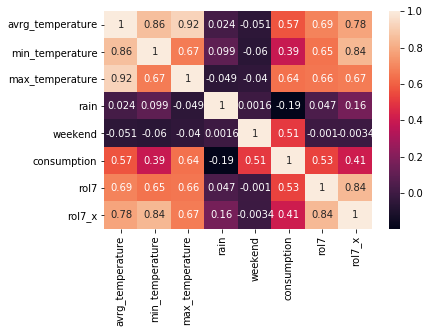

In [385]:
correlations = df.corr()
ax = sns.heatmap(correlations, annot=True)

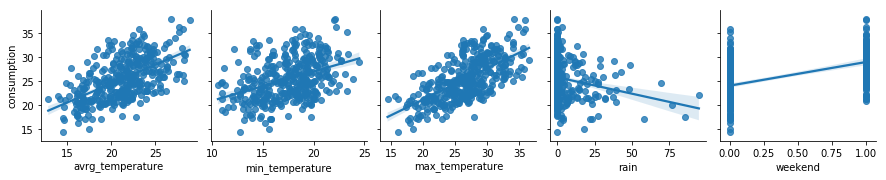

In [386]:
ax = sns.pairplot(df, y_vars='consumption', x_vars=['avrg_temperature', 'min_temperature', 'max_temperature', 'rain', 'weekend'], kind='reg')
ax

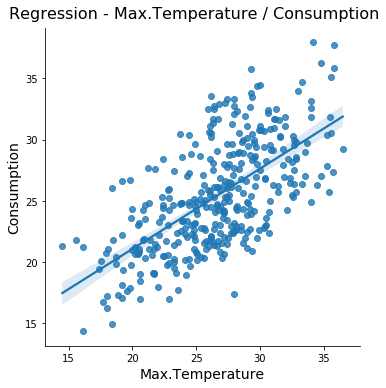

In [387]:
ax= sns.lmplot(x="max_temperature", y="consumption", data=df)
ax.fig.suptitle('Regression - Max.Temperature / Consumption', fontsize=16, y=1.02)
ax.set_xlabels("Max.Temperature", fontsize=14)
ax.set_ylabels("Consumption", fontsize=14)
ax

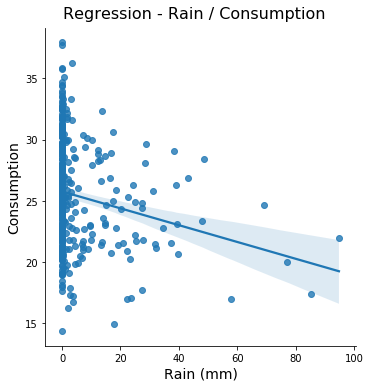

In [388]:
ax= sns.lmplot(x="rain", y="consumption", data=df)
ax.fig.suptitle('Regression - Rain / Consumption', fontsize=16, y=1.02)
ax.set_xlabels("Rain (mm)", fontsize=14)
ax.set_ylabels("Consumption", fontsize=14)
ax

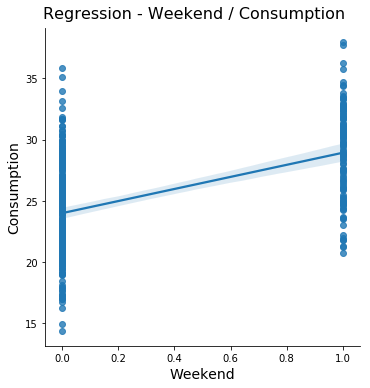

In [389]:
ax= sns.lmplot(x="weekend", y="consumption", data=df)
ax.fig.suptitle('Regression - Weekend / Consumption', fontsize=16, y=1.02)
ax.set_xlabels("Weekend", fontsize=14)
ax.set_ylabels("Consumption", fontsize=14)
ax

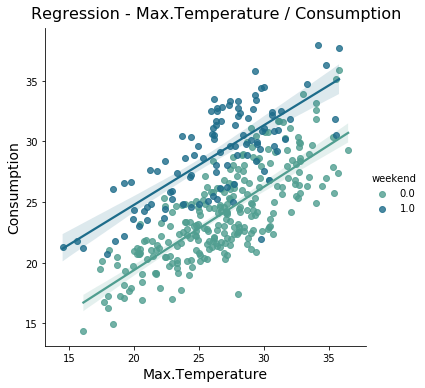

In [390]:
ax= sns.lmplot(x="max_temperature", y="consumption", data=df, hue="weekend", palette="crest")
ax.fig.suptitle('Regression - Max.Temperature / Consumption', fontsize=16, y=1.02)
ax.set_xlabels("Max.Temperature", fontsize=14)
ax.set_ylabels("Consumption", fontsize=14)
ax

# <font color=lightcoral>4.1) MACHINE LEARNING MODEL</font>
***

In [391]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [392]:
df = df.dropna()
df.shape

(359, 10)

In [393]:
df.head(1)

,date,avrg_temperature,min_temperature,max_temperature,rain,weekend,consumption,rol7,rol7_x,day_of_week
6,2015-01-07,24.0,19.5,33.7,0.0,0.0,29.732,28.842286,24.96,Wednesday


In [394]:
y = df['consumption']
X = df[['max_temperature', 'rain', 'weekend']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [395]:
X_train.shape

(251, 3)

In [396]:
model = LinearRegression()

In [397]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [398]:
print('R² = {}'. format(model.score(X_train, y_train).round(2)))

R² = 0.74


In [399]:
y_predicted = model.predict(X_test)

In [400]:
print('R² = %s' % metrics.r2_score(y_test, y_predicted).round(2))

R² = 0.68


# <font color=lightcoral>4.2) TESTING</font>
***

In [401]:
test = X_test[4:5]
test

,max_temperature,rain,weekend
13,34.0,1.6,0.0


In [402]:
# FILL UP THE NUMBERS BELOW (max_temperature, rain, weekend):

max_temperature=34
rain=1.6
weekend=1
test=[[max_temperature, rain, weekend]]

print('{0:.2f} Kliters'.format(model.predict(test)[0]))

34.27 Kliters


# <font color=lightcoral>4.3) ANALYZING RESIDUALS</font>
***

In [403]:
y_predict_train = model.predict(X_train)

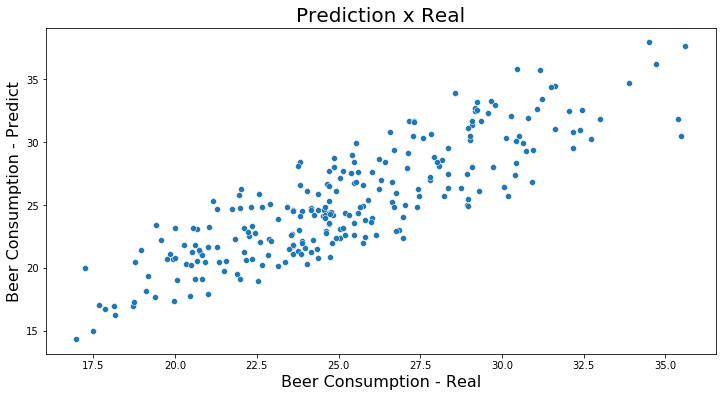

In [404]:
ax = sns.scatterplot(x=y_predict_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Prediction x Real', fontsize=20)
ax.set_ylabel('Beer Consumption - Predict', fontsize=16)
ax.set_xlabel('Beer Consumption - Real', fontsize=16)
ax

In [405]:
residue = y_train - y_predict_train

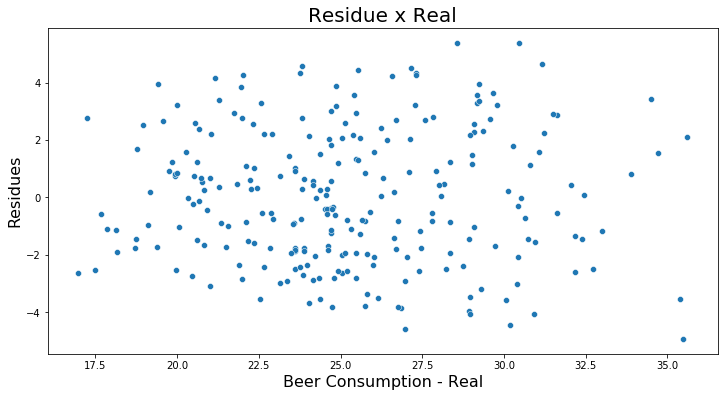

In [406]:
ax = sns.scatterplot(x=y_predict_train, y=residue)
ax.figure.set_size_inches(12, 6)
ax.set_title('Residue x Real', fontsize=20)
ax.set_ylabel('Residues', fontsize=16)
ax.set_xlabel('Beer Consumption - Real', fontsize=16)
ax